## Operation of Roation operators R(x,y,z) on the excited state

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_qsphere,plot_state_city,plot_state_hinton
from qiskit.visualization import plot_bloch_multivector, plot_state_paulivec
from qiskit.quantum_info import state_fidelity

In [2]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

In [3]:
qc.x(q[0])

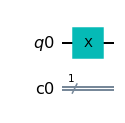

In [4]:
qc.draw('mpl')

In [5]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [6]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 =')

<IPython.core.display.Latex object>

In [7]:
from math import pi

In [8]:
qc.rx(pi/2,q[0])

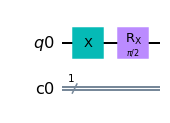

In [9]:
qc.draw('mpl')

In [10]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

In [11]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

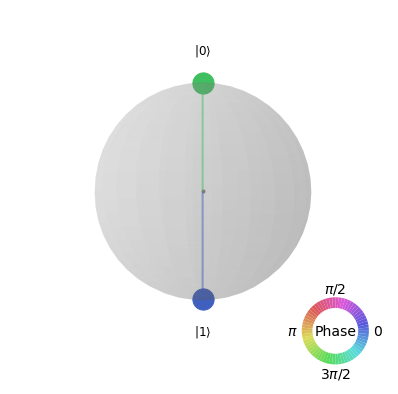

In [12]:
plot_state_qsphere(qc)

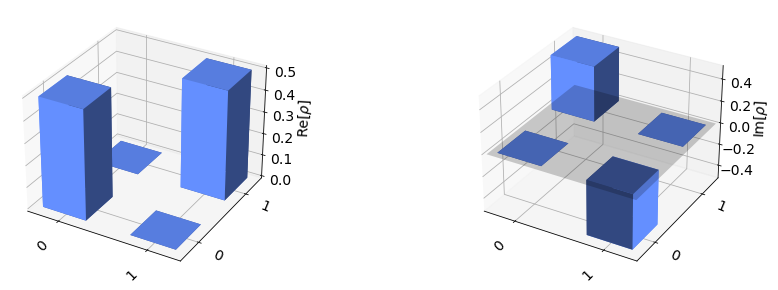

In [13]:
plot_state_city(qc)

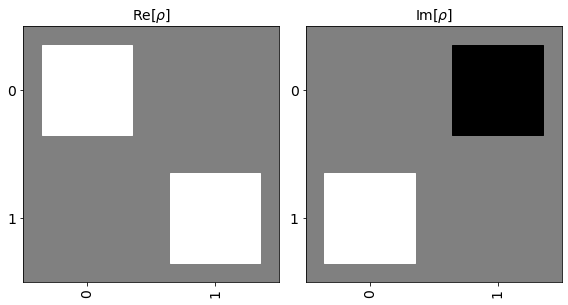

In [14]:
plot_state_hinton(qc)

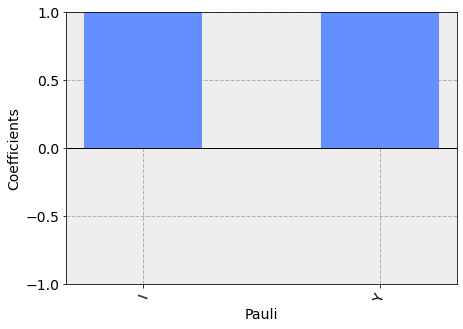

In [15]:
plot_state_paulivec(qc)

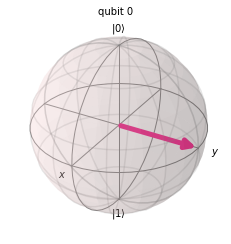

In [16]:
plot_bloch_multivector(qc)

In [17]:
purity = rho2.purity()
print(purity)

(1+0j)


In [18]:
fidelity = state_fidelity(psi1,psi2)
print('Fidelity=',fidelity)

Fidelity= 0.5000000000000001


In [19]:
fidelity = state_fidelity(rho1,rho2)
print('Fidelity=',fidelity)

Fidelity= 0.5000000000000003


In [20]:
qc.measure(q[0],c[0])

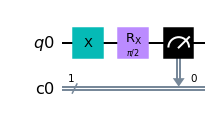

In [21]:
qc.draw('mpl')

In [22]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 519, '0': 505}


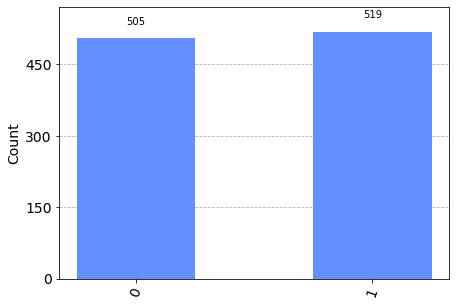

In [23]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)